<a href="https://colab.research.google.com/github/MpRonald/Deep-Learning/blob/main/Builting_First_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Comparing Celsius x Fahrenheit

In [163]:
data_temp = pd.read_csv('https://github.com/MpRonald/datasets/raw/main/Celsius-to-Fahrenheit.csv')
data_temp.reset_index(drop=True, inplace=True)
data_temp.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [164]:
data_temp.describe().T

,count,mean,std,min,25%,50%,75%,max
Celsius,30.0,2.0,22.780815,-50.0,-6.75,0.5,7.75,60.0
Fahrenheit,30.0,35.6,41.005466,-58.0,19.85,32.9,45.95,140.0


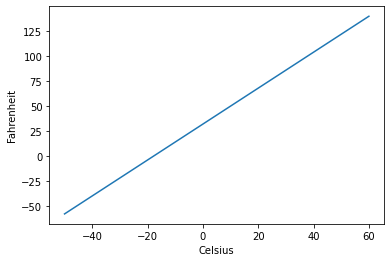

In [165]:
sns.lineplot(data=data_temp, x='Celsius', y='Fahrenheit');

In [166]:
# dividing training model
X_train = data_temp['Celsius']
y_train = data_temp['Fahrenheit']

# builting model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape= [1]))

# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(0.5), loss='mean_squared_error')

# epochs
epochs_hist = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 240ms/step - loss: 1939.2162
Epoch 2/200
1/1 [==============================] - 0s 9ms/step - loss: 1349.1257
Epoch 3/200
1/1 [==============================] - 0s 8ms/step - loss: 1021.0380
Epoch 4/200
1/1 [==============================] - 0s 8ms/step - loss: 925.5714
Epoch 5/200
1/1 [==============================] - 0s 7ms/step - loss: 980.5409
Epoch 6/200
1/1 [==============================] - 0s 6ms/step - loss: 1065.5121
Epoch 7/200
1/1 [==============================] - 0s 8ms/step - loss: 1093.3917
Epoch 8/200
1/1 [==============================] - 0s 11ms/step - loss: 1047.2181
Epoch 9/200
1/1 [==============================] - 0s 8ms/step - loss: 952.8256
Epoch 10/200
1/1 [==============================] - 0s 7ms/step - loss: 846.2896
Epoch 11/200
1/1 [==============================] - 0s 10ms/step - loss: 757.3652
Epoch 12/200
1/1 [==============================] - 0s 8ms/step - loss: 702.6314
Epoch 13/200
1/1 [=========

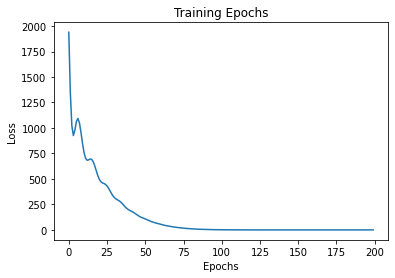

In [167]:
plt.title('Training Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
sns.lineplot(data=epochs_hist.history['loss']);

In [168]:
model.get_weights()

[array([[1.8000091]], dtype=float32), array([32.00272], dtype=float32)]

In [169]:
# checking model
temp_c = 0
temp_f = model.predict([temp_c])
print(f"The {temp_c} degree Celsius is equal to {temp_f[0][0]} degree Fahrenheit")

The 0 degree Celsius is equal to 32.00271987915039 degree Fahrenheit


In [170]:
def convert_temp():
    temp_c = float(input("Type the temperature: "))
    temp_f = model.predict([temp_c])
    print(f"The {temp_c} degree Celsius is equal to {temp_f[0][0]} degree Fahrenheit")

In [171]:
convert_temp()

Type the temperature: 15
The 15.0 degree Celsius is equal to 59.00285720825195 degree Fahrenheit


# Predicting Revenue from Icecream Sales

In [172]:
data_sales = pd.read_csv('https://github.com/MpRonald/datasets/raw/main/SalesData.csv')
data_sales

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [173]:
data_sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,500.0,22.232225,8.096388,0.0,17.122258,22.392791,27.740674,45.0
Revenue,500.0,521.570777,175.404751,10.0,405.558681,529.368565,642.257922,1000.0


In [174]:
data_sales.isnull().sum(), data_sales.duplicated().sum()

(Temperature    0
 Revenue        0
 dtype: int64, 0)

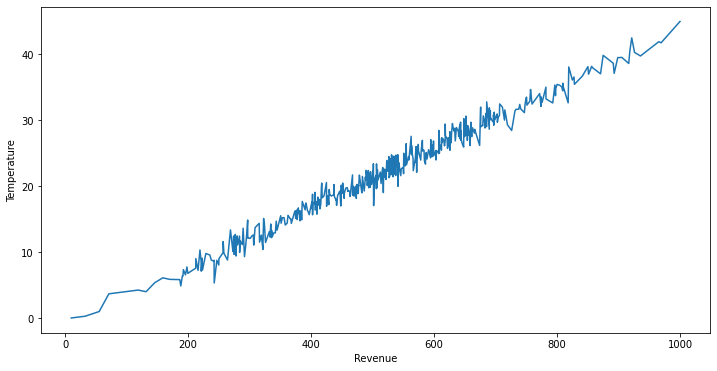

In [175]:
plt.figure(figsize=(12,6))
sns.lineplot(x=data_sales.Revenue, y=data_sales.Temperature);

In [176]:
# dividing training model
X_train2 = data_sales['Temperature']
y_train2 = data_sales['Revenue']

# builting model
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(units = 10, input_shape = [1]))
model2.add(tf.keras.layers.Dense(units = 1, input_shape= [1]))

# compile model
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.7,
                                                    beta_1=0.99,
                                                        beta_2=0.9999,
                                                           epsilon=1e-07),
                                                                loss='mean_squared_error')

# epochs
epochs_hist_sales = model2.fit(X_train2, y_train2, epochs=100)

Epoch 1/100
16/16 [==============================] - 0s 2ms/step - loss: 74936.1719
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 26522.5605
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 24006.4746
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 12395.3613
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 17719.5547
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 13280.9961
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 8668.6553
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 9074.7754
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 6412.9092
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 6972.3135
Epoch 11/100
16/16 [==============================] - 0s 2ms/step - loss: 5244.7241
Epoch 12/100
16/16 [==============================] - 0s 2ms/step - loss: 4826.

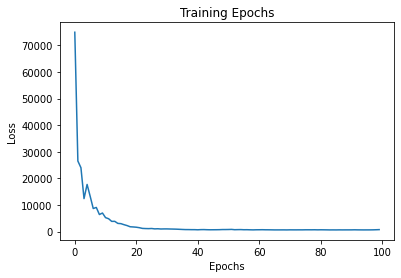

In [177]:
plt.title('Training Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
sns.lineplot(data=epochs_hist_sales.history['loss']);

In [178]:
model2.get_weights()

[array([[-0.59144205,  4.0156016 , -0.00589178, -0.42934424, -0.16372408,
         -2.2007892 , -0.02202183, -0.21404825,  0.01236509, -0.03117793]],
       dtype=float32),
 array([-1.470004  ,  3.428791  ,  0.11442158, -1.4372152 ,  1.8613491 ,
        -2.1938148 ,  0.76123387, -1.340669  , -0.49864662,  0.18450102],
       dtype=float32),
 array([[-6.1787218e-01],
        [ 4.0225830e+00],
        [-1.4847917e-03],
        [-4.6245021e-01],
        [ 7.4621983e-02],
        [-2.2202675e+00],
        [-1.0436594e-02],
        [-2.7126914e-01],
        [ 6.1952085e-03],
        [ 7.1711666e-03]], dtype=float32),
 array([24.338654], dtype=float32)]

In [179]:
# checking model
temp = 24.56
rev = model2.predict([temp])
rev

array([[576.7759]], dtype=float32)

In [180]:
data_sales

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


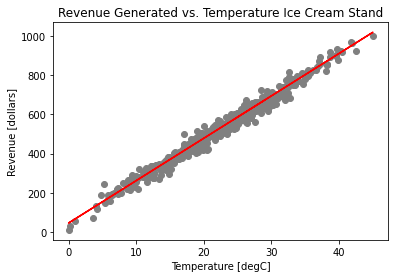

In [181]:
plt.scatter(X_train2, y_train2, color = 'gray')
plt.plot(X_train2, model2.predict(X_train2), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature Ice Cream Stand');

# Houses Prices Predicting

In [182]:
house = pd.read_csv('https://github.com/MpRonald/datasets/blob/main/kc-house-data.csv?raw=true')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [183]:
house.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [184]:
house.isnull().sum(), house.duplicated().sum()

(id               0
 date             0
 price            0
 bedrooms         0
 bathrooms        0
 sqft_living      0
 sqft_lot         0
 floors           0
 waterfront       0
 view             0
 condition        0
 grade            0
 sqft_above       0
 sqft_basement    0
 yr_built         0
 yr_renovated     0
 zipcode          0
 lat              0
 long             0
 sqft_living15    0
 sqft_lot15       0
 dtype: int64, 0)

In [185]:
new_date = house["date"].str.split("T", n=1, expand=True)
new_date

,0,1
0,20141013,000000
1,20141209,000000
2,20150225,000000
3,20141209,000000
4,20150218,000000
...,...,...
21608,20140521,000000
21609,20150223,000000
21610,20140623,000000
21611,20150116,000000


In [186]:
house['new_date'] = new_date[0]
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,new_date
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,20141013
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,20141209
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,20150225
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,20141209
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,20150218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,20140521
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,20150223
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,20140623
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,20150116


In [187]:
house.new_date = pd.to_datetime(house.new_date, format='%Y/%m/%d')
house.new_date

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: new_date, Length: 21613, dtype: datetime64[ns]

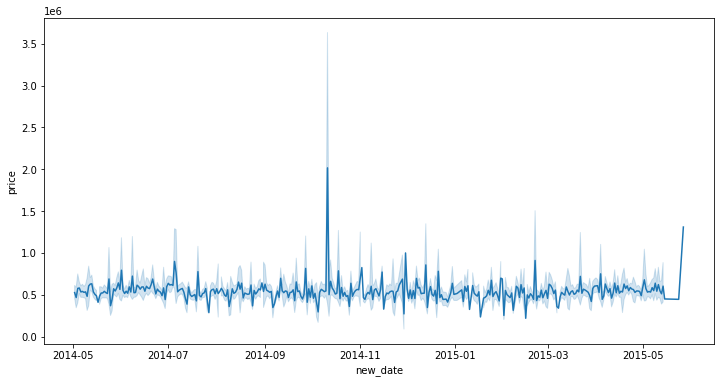

In [188]:
plt.figure(figsize=(12,6))
sns.lineplot(x=house.new_date, y=house.price);

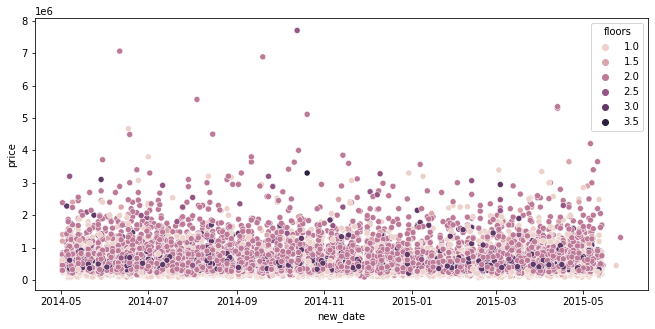

In [189]:
plt.figure(figsize=(11,5))
sns.scatterplot(x=house.new_date, y=house.price, hue=house.floors);

In [190]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'new_date'],
      dtype='object')

In [191]:
dataset = house[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
       'sqft_living15', 'sqft_lot15', 'price']]
dataset.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,510000.0


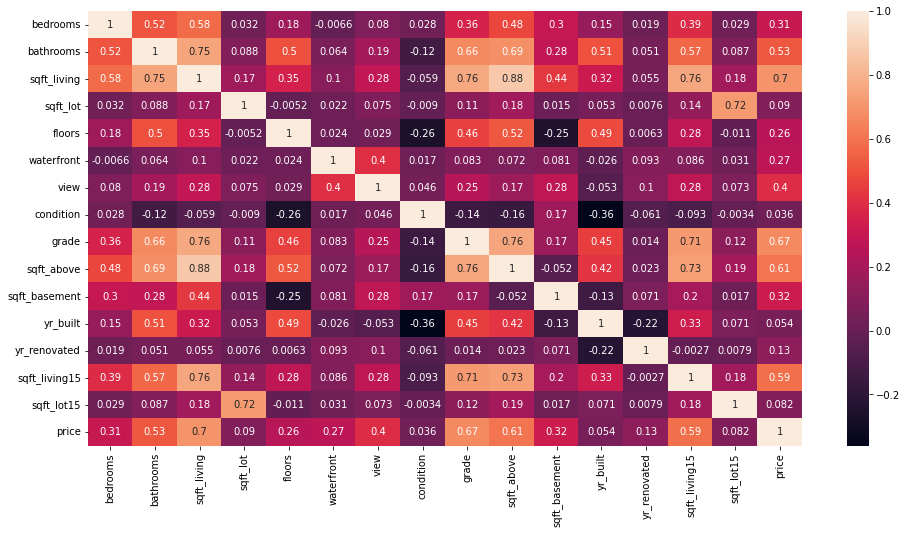

In [192]:
plt.figure(figsize=(16,8))
sns.heatmap(dataset.corr(), annot=True);

In [193]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  sqft_living15  21613 non-null  int64  
 14  sqft_lot15     21613 non-null  int64  
 15  price          21613 non-null  float64
dtypes: float64(3), int64(13)
memory usage: 2.6 MB


In [194]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1:].values
X.shape, y.shape

((21613, 15), (21613, 1))

In [195]:
scaler_x = MinMaxScaler()
scaler_x.fit_transform(X)
X = scaler_x.transform(X)
X

array([[9.09090909e-02, 1.25000000e-01, 6.71698113e-02, ...,
        0.00000000e+00, 1.61934263e-01, 5.74235339e-03],
       [9.09090909e-02, 2.81250000e-01, 1.72075472e-01, ...,
        9.88089330e-01, 2.22164860e-01, 8.02711852e-03],
       [6.06060606e-02, 1.25000000e-01, 3.62264151e-02, ...,
        0.00000000e+00, 3.99414903e-01, 8.51301880e-03],
       ...,
       [6.06060606e-02, 9.37500000e-02, 5.50943396e-02, ...,
        0.00000000e+00, 1.06866288e-01, 1.55763777e-03],
       [9.09090909e-02, 3.12500000e-01, 9.88679245e-02, ...,
        0.00000000e+00, 1.73980382e-01, 7.30573466e-04],
       [6.06060606e-02, 9.37500000e-02, 5.50943396e-02, ...,
        0.00000000e+00, 1.06866288e-01, 8.10982495e-04]])

In [196]:
scaler_y = MinMaxScaler()
scaler_y.fit_transform(y)
y = scaler_y.transform(y)
y

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17290, 15), (4323, 15), (17290, 1), (4323, 1))

Epoch 1/100
277/277 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 6.3653e-04
Epoch 2/100
277/277 [==============================] - 1s 3ms/step - loss: 6.7065e-04 - val_loss: 6.0726e-04
Epoch 3/100
277/277 [==============================] - 1s 3ms/step - loss: 6.7033e-04 - val_loss: 6.8456e-04
Epoch 4/100
277/277 [==============================] - 1s 3ms/step - loss: 6.1949e-04 - val_loss: 6.2208e-04
Epoch 5/100
277/277 [==============================] - 1s 3ms/step - loss: 6.1412e-04 - val_loss: 6.3359e-04
Epoch 6/100
277/277 [==============================] - 1s 3ms/step - loss: 6.0010e-04 - val_loss: 5.5928e-04
Epoch 7/100
277/277 [==============================] - 1s 3ms/step - loss: 5.8685e-04 - val_loss: 5.6320e-04
Epoch 8/100
277/277 [==============================] - 1s 3ms/step - loss: 5.6166e-04 - val_loss: 6.1120e-04
Epoch 9/100
277/277 [==============================] - 1s 3ms/step - loss: 5.7554e-04 - val_loss: 6.9749e-04
Epoch 10/100
277/277 [=

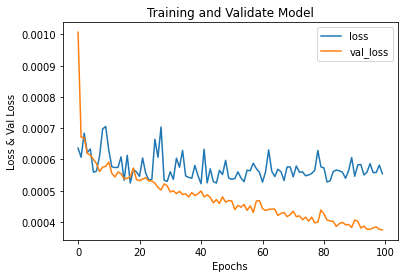

In [198]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(15,)))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

# compile model
model.compile(optimizer='Adam', loss='mean_squared_error')
epochs_house = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_split=0.2)
plt.title('Training and Validate Model')
plt.xlabel('Epochs')
plt.ylabel('Loss & Val Loss')
sns.lineplot(data=epochs_house.history['val_loss'])
sns.lineplot(data=epochs_house.history['loss'])
plt.legend(['loss', 'val_loss']);

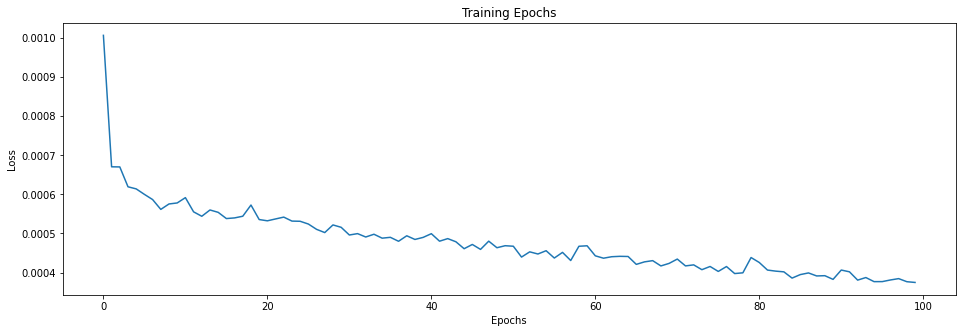

In [199]:
plt.figure(figsize=(16,5))
plt.title('Training Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
sns.lineplot(data=epochs_house.history['loss']);

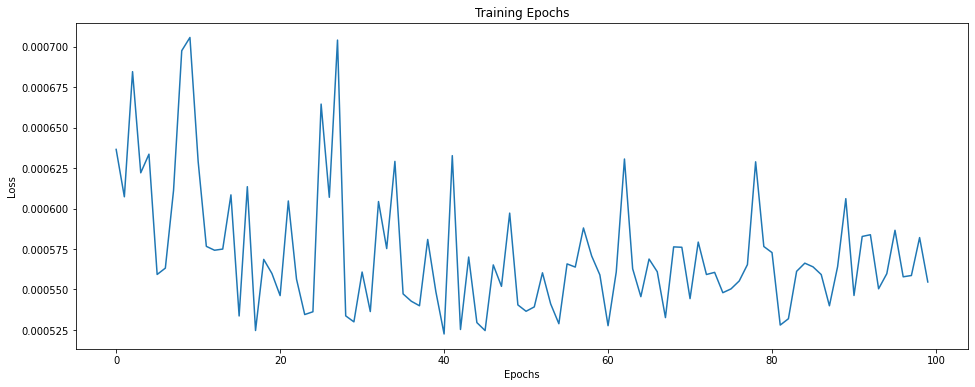

In [200]:
plt.figure(figsize=(16,6))
plt.title('Training Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
sns.lineplot(data=epochs_house.history['val_loss']);

In [201]:
model.get_weights()

[array([[ 0.12126559, -0.3375193 , -0.12011027, ...,  0.08332449,
         -0.3962507 ,  0.47303933],
        [ 0.2160071 , -0.33330137, -0.02518922, ..., -0.04906165,
         -0.18966007,  0.40444028],
        [ 0.08303254,  0.09967683,  0.1541699 , ..., -0.1074461 ,
          0.10807411, -0.24921669],
        ...,
        [-0.11072108,  0.1850054 , -0.22001612, ...,  0.12584707,
         -0.13989663, -0.27419734],
        [-0.27948728, -0.19826901,  0.10598606, ..., -0.12493186,
         -0.30617607, -0.41382182],
        [ 0.25822264,  0.104933  , -0.00209655, ...,  0.08660667,
         -0.35902798,  0.40329638]], dtype=float32),
 array([-0.11136672, -0.0149682 , -0.02019456,  0.04750629,  0.04968031,
         0.01809352,  0.08475341,  0.04881684, -0.20124345, -0.01012579,
         0.00819905,  0.        , -0.00625943, -0.00627418,  0.02588754,
        -0.10109363, -0.03740507,  0.05932385, -0.02069381,  0.04292159,
        -0.06272311,  0.13708703, -0.00043335,  0.04040832, -0.068

In [202]:
# checking model
test_model = dataset.iloc[150,:-1]
test = []
for i in range(len(test_model)):
    test.append(test_model[i])
print(test), type(test)

[3.0, 2.0, 1360.0, 3090.0, 2.0, 0.0, 0.0, 3.0, 8.0, 1360.0, 0.0, 1990.0, 0.0, 1500.0, 3090.0]


(None, list)

In [211]:
X_test_1 = np.array([test])

scaler_1 = MinMaxScaler()
X_test_scaled_1 = scaler_1.fit_transform(X_test_1)

y_predict_1 = model.predict(X_test_scaled_1)

y_predict_1 = scaler_y.inverse_transform(y_predict_1)
y_predict_1

array([[185001.6]], dtype=float32)

In [213]:
valid = dataset.iloc[150,-1:]
valid

price    532170.0
Name: 150, dtype: float64

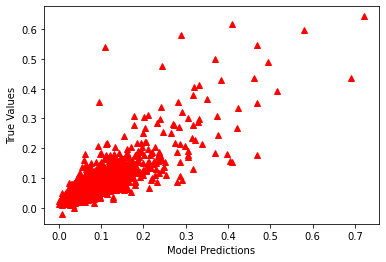

In [214]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values');

In [215]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

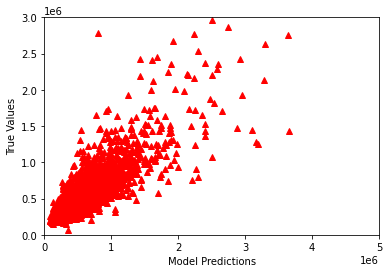

In [216]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000);

In [217]:
k = X_test.shape[1]
n = len(X_test)
n

4323

In [220]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


MSE = 43270304517.97301 
MAE = 126154.29111366528 
R2 = 0.7137766533482044 
Adjusted R2 = 0.7127798225611655
